## Определение перспективного тарифа для телеком-компании

Описание тарифов
- Тариф «Смарт»
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей
- Тариф «Ультра»
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

Описание данных
##### Таблица users (информация о пользователях):
-  user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tarif — название тарифного плана
##### Таблица calls (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок
##### Таблица messages (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение
##### Таблица internet (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя
##### Таблица tariffs (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

####  Задачи исследования 
1. Сделать предварительный анализ тарифов «Смарт» и «Ультра» на небольшой выборке клиентов
2. Выяснить какой тариф приносит больше денег компании «Мегалайн»
3. Проанализировать поведение клиентов и сделать вывод — какой тариф лучше

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None)
from scipy import stats as st

### 1.Открытие файлов и изучение общей информации

In [5]:
data_internet = pd.read_csv('/datasets/internet.csv', sep = ',')
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [6]:
data_messages = pd.read_csv('/datasets/messages.csv', sep = ',')
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [7]:
data_users = pd.read_csv('/datasets/users.csv', sep = ',')
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
data_tariffs = pd.read_csv('/datasets/tariffs.csv', sep = ',')
data_tariffs.info()
display (data_tariffs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [9]:
data_calls = pd.read_csv('/datasets/calls.csv', sep = ',')
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Посмотрим количество пропущенных значений

In [10]:
data = [data_calls, 
        data_internet, 
        data_messages, 
        data_tariffs, 
        data_users]
for i in range(len(data)):
    display(data[i].isna().sum())

id           0
call_date    0
duration     0
user_id      0
dtype: int64

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

id              0
message_date    0
user_id         0
dtype: int64

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

<div class="alert alert-info" role="alert">
    В описании данных указано, что в столбце churn_date — если значение пропущено, то тариф ещё действовал на момент выгрузки данных. Таких значений немного, предлагаю их не трогать. Их пропуски логично обьяснены. В продолжении исследования выяснилось, что пропусков слишком много в этом столбце и я его совсем удалила, т.к. он неважен для исследования

### 2.Подготовка данных

####  Приведите данные к нужным типам;



Изменим тип дат из object на date

In [11]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format = '%Y-%m-%d %H:%M')
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format = '%Y-%m-%d %H:%M')
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format = '%Y-%m-%d %H:%M')

Вычислим количество месяцев использования интернета

In [12]:
data_internet['month'] = data_internet['session_date'].dt.month

In [13]:
data_messages['month'] = data_messages['message_date'].dt.month

In [14]:
data_calls['month'] = data_calls['call_date'].dt.month

#### 2.Обьденение таблиц

Для начала сгруппируем таблицы по месяцам и id пользователей для обьеденения

#### Информация об интернет-сессиях  по месяцам

In [15]:
internet_month = data_internet.pivot_table(index = ['user_id','month'],
                                           values = 'mb_used',
                                           aggfunc = 'sum').reset_index()
internet_month.columns = ['user_id','month','sum_mb']
internet_month.head()

,user_id,month,sum_mb
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


#### Информация об sms  по месяцам

In [16]:
messages_month = data_messages.pivot_table(index = ['user_id','month'],
                                           values = 'id',
                                           aggfunc = 'count').reset_index()
messages_month.columns = ['user_id','month','sum_sms']
messages_month.head()

,user_id,month,sum_sms
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


#### Информация о звонках по месяцам

Округлим значения звонков, как указано в условии (в большую сторону)

In [17]:
data_calls ['duration'] = np.ceil(data_calls['duration'])

In [18]:
calls_month = data_calls.pivot_table(index = ['user_id','month'],
                                           values = 'duration',
                                           aggfunc = 'sum').reset_index()
calls_month.columns = ['user_id','month','sum_calls']
calls_month.head()

,user_id,month,sum_calls
0,1000,5,159.0
1,1000,6,172.0
2,1000,7,340.0
3,1000,8,408.0
4,1000,9,466.0


In [20]:
calls_month['sum_calls'] = calls_month['sum_calls'].astype ('int')

### Обьединение таблиц

In [21]:
data = data_users.merge(calls_month, on = 'user_id', how = 'outer')

In [22]:
data = data.merge (messages_month, on = ['user_id','month'], how = 'outer')

In [23]:
data_tariffs = data_tariffs.rename(columns = {'tariff_name':'tariff'})

In [24]:
data = data.merge (data_tariffs, on = 'tariff', how = 'left')

In [25]:
data = data.merge(internet_month, on = ['user_id','month'], how = 'outer')
display (data)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,sum_calls,sum_sms,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,sum_mb
0,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,159.0,22.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,2253.49
1,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,172.0,60.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,23233.77
2,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,340.0,75.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,14003.64
3,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,408.0,81.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,14055.93
4,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,466.0,57.0,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,14568.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,1489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17206.30
3218,1489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19559.44
3219,1489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17491.56
3220,1489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17322.51


Мы имеем таблицу для дальнейшей работы, где содержится информация о звонках, смс и потраченном трафике всех пользователей

Округлим значения согласно условию:
- «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
- Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

In [26]:
data['sum_mb'] = data['sum_mb']/1024
data['sum_mb'] = np.ceil(data['sum_mb'])
data['sum_mb'] = data['sum_mb'].fillna(0)
data['sum_mb'] = data['sum_mb'].astype ('int')
data = data.rename (columns = {'sum_mb':'sum_gb'})

In [27]:
data['sum_sms'] = data['sum_sms'].fillna(0)
data['sum_calls'] = data['sum_calls'].fillna(0)

In [28]:
data['gb_per_month_included'] = data['mb_per_month_included']/1024

Посчитайте для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [29]:
def revenue (row):
    sms = (row ['sum_sms'] - row['messages_included'])*row['rub_per_message']
    calls = (row ['sum_calls'] - row['minutes_included'])*row['rub_per_minute']
    internet = (row ['sum_gb'] - row['gb_per_month_included'])*row['rub_per_gb']
    total = 0
    for i in [sms,calls,internet]:
        if i>0:
            total += i
    total +=  row['rub_monthly_fee']
    return total
data['revenue'] = data.apply(revenue,axis = 1)
display (data.head (10))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,sum_calls,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,sum_gb,gb_per_month_included,revenue
0,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,159.0,...,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,3,30.0,1950.0
1,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,172.0,...,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,23,30.0,1950.0
2,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,340.0,...,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,14,30.0,1950.0
3,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,408.0,...,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,14,30.0,1950.0
4,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,466.0,...,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,15,30.0,1950.0
5,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,10.0,350.0,...,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,15,30.0,1950.0
6,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,11.0,338.0,...,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,15,30.0,1950.0
7,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12.0,333.0,...,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,10,30.0,1950.0
8,1001,41.0,NaN,Москва,Иван,Ежов,2018-11-01,smart,11.0,430.0,...,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,18,15.0,1150.0
9,1001,41.0,NaN,Москва,Иван,Ежов,2018-11-01,smart,12.0,414.0,...,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,14,15.0,550.0


In [30]:
data.isna().sum()

user_id                     0
age                        40
churn_date               3033
city                       40
first_name                 40
last_name                  40
reg_date                   40
tariff                     40
month                       8
sum_calls                   0
sum_sms                     0
messages_included          40
mb_per_month_included      40
minutes_included           40
rub_monthly_fee            40
rub_per_gb                 40
rub_per_message            40
rub_per_minute             40
sum_gb                      0
gb_per_month_included      40
revenue                    40
dtype: int64

<div class="alert alert-info" role="alert">
    удалим колонку churn_date, т.к. в ней много пропусков и она не нужна для исследования

In [31]:
data = data.drop(columns = ['churn_date'],axis = 1,inplace = True) 

<div class="alert alert-info" role="alert">
     Если значение равно нулю или будет отрицательным, то это значит, что пользователь не перерасходовал лимит своего тарифа и оплачивает только абоненскую плату.

### 3.Анализ данных

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

Сделаем сводную таблицу по тарифам и посчитаем дисперсию, среднее количество и стандатрное отклонение для каждого показателя

In [32]:
data_analis = data.pivot_table(index = 'tariff', 
                 values= ['sum_sms','sum_calls','sum_gb'], 
                 aggfunc= ['mean', 'var','std'])
display (data_analis.round().head())

mean                      var                      std         \
       sum_calls sum_gb sum_sms sum_calls sum_gb sum_sms sum_calls sum_gb   
tariff                                                                      
smart      419.0   16.0    33.0   35970.0   33.0   799.0     190.0    6.0   
ultra      542.0   19.0    49.0   95468.0  100.0  2200.0     309.0   10.0   

                
       sum_sms  
tariff          
smart     28.0  
ultra     47.0

<div class="alert alert-info" role="alert">
    Так как дисперсии сильно отличаются,то в стат. анализе будет выбирать параметр  equal_var =  False

Сделаем выборку по тарифам Смарт и Ультра 

In [33]:
data_ultra = data.query ('tariff == "ultra"')

In [34]:
data_smart = data.query ('tariff == "smart"')

In [35]:
#data_smart_month = data_smart.pivot_table(index = ['month'],
                                           #values = ['sum_sms','sum_calls','sum_gb'],
                                           #aggfunc = 'sum').reset_index()

Построим гисторграммы использования услуг в тарифах Смарт и Ультра

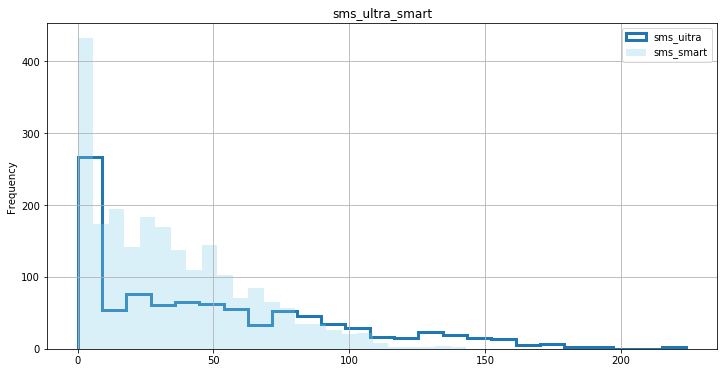

In [36]:
ax = (data_ultra.plot(kind = 'hist', y = 'sum_sms',
                          histtype = 'step',
                          linewidth = 3,
                          legend = True,
                          label ='sms_uitra',
                      grid = True, figsize = (12,6), bins = 25
                      
                          )
         )
(         data_smart.plot(kind = 'hist', y = 'sum_sms',
                                ax = ax,
                                alpha = 0.3,
                                legend = True,
                                label ='sms_smart',
                                title = 'sms_ultra_smart',
                          grid = True, figsize = (12,6), bins = 25, color='skyblue'
                          )
);

По гистограммам мы видим, что пользователи тарифа Смарт гораздо более активно используют смс сообщения в обьеме от нуля до 100 в пакете, тогда как на тарифе Ультра есть доля пользоваталей, которые отправляют более 150 смс в месяц. Однако на. тарифе Смарт гораздо больше пользоватлей, которые не пользуются смс вовсе (первый скачок на диаграмме у нуля). 

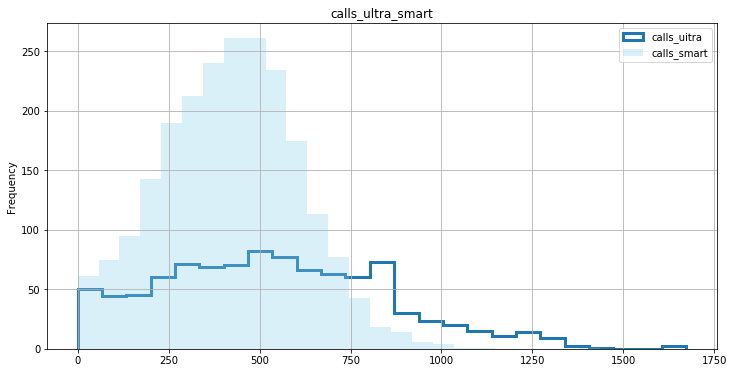

In [37]:
ax = (data_ultra.plot(kind = 'hist', y = 'sum_calls',
                          histtype = 'step',
                          linewidth = 3,
                          legend = True,
                          label ='calls_uitra',
                      grid = True, figsize = (12,6), bins = 25
                      
                          )
         )
(         data_smart.plot(kind = 'hist', y = 'sum_calls',
                                ax = ax,
                                alpha = 0.3,
                                legend = True,
                                label ='calls_smart',
                                title = 'calls_ultra_smart',
                          grid = True, figsize = (12,6), bins = 25, color='skyblue'
                          )
);

Пользоватлеи тарифа Смарт звонят гораздо активнее пользователей тарифа Ультра. Порядка 250 пользователей совершает треть всех звонков на этом тарифе. 

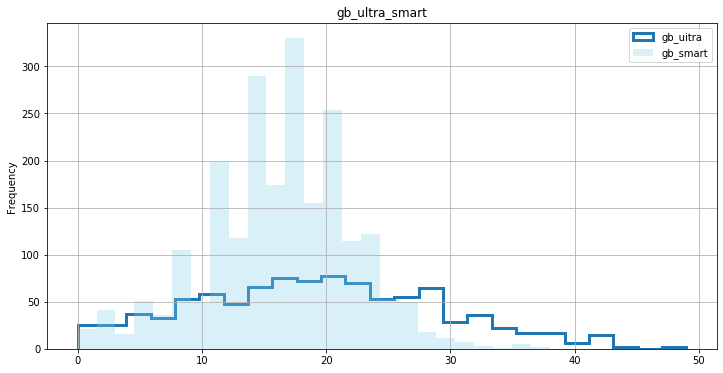

In [38]:
ax = (data_ultra.plot(kind = 'hist', y = 'sum_gb',
                          histtype = 'step',
                          linewidth = 3,
                          legend = True,
                          label ='gb_uitra',
                      grid = True, figsize = (12,6), bins = 25
                      
                          )
         )
(         data_smart.plot(kind = 'hist', y = 'sum_gb',
                                ax = ax,
                                alpha = 0.3,
                                legend = True,
                                label ='gb_smart',
                                title = 'gb_ultra_smart',
                          grid = True, figsize = (12,6), bins = 25, color='skyblue'
                          )
);

Пользователи тарифа Смарт неравномерно используют интернет. На графике видны скачки от 10 до 22 гб интернета. Возможно эти скачки обьясняются системой пакетов поставки интернета пользователю и многие пользователи не покупают следующий пакет, когда предыдущий закончился. На тарифе Ультра все равномерно и стабильно)

### 4.Проверка гипотез

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов.
- Пороговое значение alpha задайте самостоятельно.
Поясните:
- как вы формулировали нулевую и альтернативную гипотезы;
- какой критерий использовали для проверки гипотез и почему.

#### Нулевая гипотеза: средние значения выручки генеральных совокупностей от тарифов «Ультра» и «Смарт» равны. 
#### Альтернативная гипотеза: среднее значение выручки генеральных совокупностей тарифов не равны (будем делать двухстороннюю проверку).
Нулевая гипотеза формируется из равенства параметров, а альтернативная относильно ее. 

In [39]:
std_ultra = np.std (data_ultra['revenue'],ddof = 1)
print('Стандартное отклонение выручки_ultra:',std_ultra)
std_smart = np.std (data_smart['revenue'],ddof = 1)
print('Стандартное отклонение выручки_smart:',std_smart)


Стандартное отклонение выручки_ultra: 378.3514863127655
Стандартное отклонение выручки_smart: 819.0525887092329


In [40]:
sample_1 = data_ultra['revenue'] # данные по выручке тарифа Ультра
sample_2 = data_smart['revenue'] # данные по выручке тарифа Смарт

alpha = .05 #выберем альфа 5%
results = st.ttest_ind(sample_1, sample_2, equal_var = False)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не отвергаем нулевую гипотезу')

p-значение:  2.796424815525196e-246
Отвергаем нулевую гипотезу


Вывод: Выручки тарифов Смарт и Ультра не равны

#### Нулевая гипотеза: средние значения выручки генеральных совокупностей от тарифов «Ультра» и «Смарт» в Москве и регионах равны. 
#### Альтернативная гипотеза: среднее значение выручки генеральных совокупностей тарифов не равны (будем делать двухстороннюю проверку).

In [41]:
data.isna().sum()

user_id                   0
age                      40
city                     40
first_name               40
last_name                40
reg_date                 40
tariff                   40
month                     8
sum_calls                 0
sum_sms                   0
messages_included        40
mb_per_month_included    40
minutes_included         40
rub_monthly_fee          40
rub_per_gb               40
rub_per_message          40
rub_per_minute           40
sum_gb                    0
gb_per_month_included    40
revenue                  40
dtype: int64

In [42]:
data = data.dropna(subset=['revenue', 'city'])

In [43]:
from scipy import stats as st
sample_3 = data[data['city']!= 'Москва']['revenue']
sample_4 = data[data['city'] == 'Москва']['revenue'] 

alpha = .05 #выберем альфа 5%
results = st.ttest_ind(sample_3, sample_4, equal_var =  False)
# equal_var - считать ли равными дисперсии выборок, по умолчанию имеет значение False
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не отвергаем нулевую гипотезу')

p-значение:  0.4452390325541491
Не отвергаем нулевую гипотезу


Вывод: Средняя выручка в Москве и регионах на двух тарифах равна

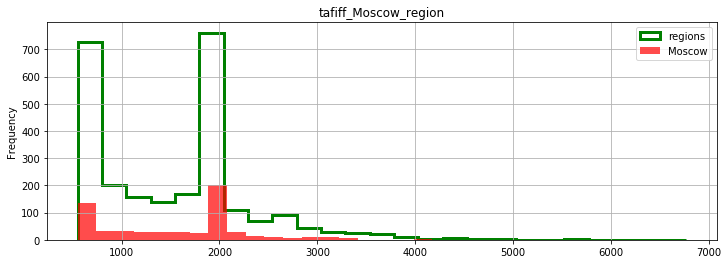

In [44]:
ax = (sample_3.plot(kind = 'hist', y = 'revenue',
                          histtype = 'step',
                          linewidth = 3,
                          legend = True,
                          label ='regions',
                      grid = True, figsize = (12,4), bins = 25, color='green'
                      
                          )
         )
(        sample_4.plot(kind = 'hist', y = 'revenue',
                                ax = ax,
                                alpha = 0.7,
                                legend = True,
                                label ='Moscow',
                                title = 'tafiff_Moscow_region',
                          grid = True, figsize = (12,4), bins = 25, color='red'
                          )
);

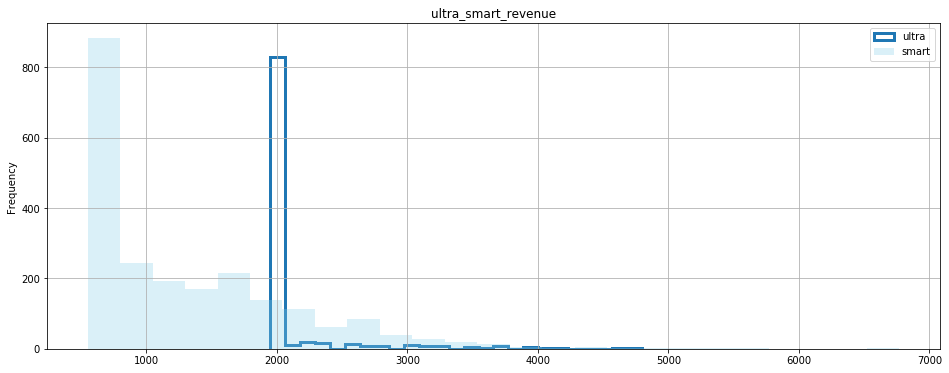

In [45]:
ax = (sample_1.plot(kind = 'hist', y = 'revenue',
                          histtype = 'step',
                          linewidth = 3,
                          legend = True,
                          label ='ultra',
                      grid = True, figsize = (16,6), bins = 25
                      
                          )
         )
(        sample_2.plot(kind = 'hist', y = 'revenue',
                                ax = ax,
                                alpha = 0.3,
                                legend = True,
                                label ='smart',
                                title = 'ultra_smart_revenue',
                          grid = True, figsize = (16,6), bins = 25, color='skyblue'
                          )
);

<div class="alert alert-info" role="alert">
    По графику выручки видно, что у тарифа Cмарт суммарная выручка больше от продажи стандартного пакета, чем на тарифе Ультра (столбик, указывающий на количество выручки за счет покупки стандартного пакета). 
    Кроме этого на тарифе Смарт гораздо больше пользотвателей выходят за рамки стандартного пакета и покупают дополнительные услуги.  Последующая сортировка по выручке показала, что даже самый прибыльный для компании пользователь использует тариф Смарт. Пользователь потратил 6770 рублей за месяц. 

In [46]:
data_ultra['revenue'].sort_values(ascending = False)

784     4800.0
1503    4650.0
1601    4200.0
1888    4050.0
1150    3900.0
         ...  
2182    1950.0
2181    1950.0
2180    1950.0
2179    1950.0
0       1950.0
Name: revenue, Length: 957, dtype: float64

In [47]:
data_smart['revenue'].sort_values(ascending = False)

3113    6770.0
260     5709.0
3112    5680.0
1626    5672.0
1797    5321.0
         ...  
2052     550.0
2057     550.0
2059     550.0
2063     550.0
1106     550.0
Name: revenue, Length: 2225, dtype: float64

### 5.Общий вывод

После анализа тарифов Ультра и Смарт мы видим следующую картину: 

1. Смс на тарифе Смарт видно большое количетсво пользователей, которые не используют смс вовсе. Их больше, чем на тарифе Ультра. Однако в рамках диапазао 0-100 смс в месяц бользователи тарифа Смарт гораздо более активны, чем пользователи тарифа Ультра. 
2. Звонков на тарифе Смарт значитель больше, чем на тарифе Ультра. На тарифе Ультра есть пользователи, которые говорят более 1000 минут в месяц.  На тарифе Смарт такиех пользователей уже нет
3. Интернет на тарифе Смарт используется чаще и в бОльших обьмемах, чем на тарифе Ультра. Можно также сказать, что на тарифе Смарт используются пакеты продления интернета. Этим обуславливаются скачки на диаграмме Смарта
4. Выручка. Очевидным выводом из вышеописанной сиутации с смс, звонками и интерентом является более высокая выручка на тарифе Смарт. Тариф Ультра больше используют пользоватли, которые не используют дополнительные услуги за рамками начальных тарифов. Это обуславливается тем, что на этом тарифе начальные условия значительно больше Смарта (Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика)
5. Тариф ультра используется в регионах в рамках стандартного пакета в значительно большей степени (примерно в 3 раза), чем в Москве. За рамками пакета небольшая группа пользователей использует тариф Ультра в Москве и регионах примерно в одинаковом количестве
6. Тариф Смарт гораздо более активно распространен в регионах, чем Ультра. Выручка тарифа по регионам выше, чем выручка по Москве. В регионах также достаточно много пользователей, которые исопльзуют тариф в рамках станадартного (базового пакета). 




### 5.Рекоммендации

Согласно результам исследования для тарифа компании для Мегалайн будет выгодно развитие тарифа Смарт в регионах и маркт. бюджет следует направить в эту область.
А на тарифе Ультра следует пересмотреть стандартный пакет, сделать его более гибким, позволить пользователю конвернтации остатка пакета (минуты в гб и наоборот). Также для Ультры следует добавить. гибкие возможности роуминга, это привлечет пользователей из Москвы,  которые часто путешествую и используюет большие пакеты интернета.  